In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import tqdm

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

# Данные

In [3]:
df = pd.read_parquet('/Users/anastasts/Мой диск/Магистратура МИЭМ/1. Диплом/Подготовленные_данные/all_data.parquet', 
                  index=False, engine='fastparquet')

In [4]:
df

,id,pre_since_opened_0,pre_since_opened_1,pre_since_opened_2,pre_since_opened_3,pre_since_opened_4,pre_since_opened_5,pre_since_opened_6,pre_since_opened_7,pre_since_opened_8,...,fclose_flag_1,pre_loans5_11,pre_loans3060_6,pre_since_confirmed_15,pre_loans3060_4,pre_loans6090_0,pre_loans3060_3,pre_loans_total_overdue_1,pre_loans_max_overdue_sum_0,flag
0,0,0,1,1,1,1,2,0,1,0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0,0,1,0,0,0,0,1,2,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,1,0,0,0,0,0,0,0,0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,0,3,1,0,2,1,3,0,0,...,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,0,0,0,0,0,0,0,0,0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2999995,1,2,0,0,2,0,1,0,0,...,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2999996,2999996,0,1,0,1,1,5,0,0,1,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2999997,2999997,0,0,1,1,3,0,0,0,0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2999998,2999998,0,0,0,0,1,0,0,1,0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# GradientBoostingClassifier

Разделим выборку на test и train

In [5]:
def split(data):
    X = data.drop('flag', axis=1)
    y = data['flag']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
    
    return X_train, X_test, y_train, y_test

In [6]:
X_train, X_test, y_train, y_test = split(df)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2100000, 420), (900000, 420), (2100000,), (900000,))

In [8]:
X = df.drop('flag', axis=1)
y = df['flag']

## Baseline

In [9]:
model_gb = GradientBoostingClassifier(
    n_estimators=10, 
    max_depth=6,  
    learning_rate=0.1,
    verbose=1
)

In [10]:
model_gb.fit(
    X_train, y_train
)

      Iter       Train Loss   Remaining Time 
         1           0.3024           14.07m
         2           0.2996           14.84m
         3           0.2972           12.66m
         4           0.2952           10.91m
         5           0.2935            9.09m
         6           0.2920            7.29m
         7           0.2907            5.47m
         8           0.2896            3.66m
         9           0.2886            1.83m
        10           0.2876            0.00s


GradientBoostingClassifier(max_depth=6, n_estimators=10, verbose=1)

In [11]:
y_pred = model_gb.predict(X_test)

In [12]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

In [13]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5001135341599243

### Feature importance

In [25]:
feature_importance = model_gb.feature_importances_
feature_importance

array([9.72287881e-03, 0.00000000e+00, 0.00000000e+00, 4.23102978e-04,
       1.75954433e-04, 0.00000000e+00, 6.99006362e-04, 4.20765126e-04,
       6.09799637e-04, 2.69634356e-04, 1.46264446e-04, 0.00000000e+00,
       0.00000000e+00, 3.05256098e-02, 1.24504103e-04, 0.00000000e+00,
       1.80882933e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.04280230e-03, 5.69221962e-04, 3.72911357e-04, 5.56803870e-04,
       1.51167650e-04, 0.00000000e+00, 5.03393033e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.80852425e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.49404494e-04, 2.37393555e-04,
       0.00000000e+00, 1.02116545e-03, 4.00714546e-04, 0.00000000e+00,
       2.75672861e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.56856466e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.35281093e-07,
      

In [26]:
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

array([9.29737178e+00, 0.00000000e+00, 0.00000000e+00, 4.04586518e-01,
       1.68254054e-01, 0.00000000e+00, 6.68415410e-01, 4.02350979e-01,
       5.83112682e-01, 2.57834218e-01, 1.39863404e-01, 0.00000000e+00,
       0.00000000e+00, 2.91897029e+01, 1.19055370e-01, 0.00000000e+00,
       1.72966866e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.97165636e-01, 5.44310827e-01, 3.56591458e-01, 5.32436194e-01,
       1.44552028e-01, 0.00000000e+00, 4.81362801e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.37926908e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.38489685e-01, 2.27004387e-01,
       0.00000000e+00, 9.76475693e-01, 3.83177883e-01, 0.00000000e+00,
       2.63608457e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.49991881e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.07478981e-04,
      

In [27]:
sorted_idx = np.argsort(feature_importance)
sorted_idx

array([419, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 175, 329, 192, 193, 387, 327, 196, 197, 198, 199, 200,
       326, 202, 204, 205, 207, 191, 413, 174, 172, 338, 337, 333, 332,
       291, 146, 147, 414, 149, 150, 331, 152, 330, 154, 173, 155, 157,
       158, 159, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       156, 418, 412, 324, 255, 256, 308, 258, 260, 262, 263, 307, 265,
       266, 268, 269, 270, 271, 252, 272, 400, 275, 304, 303, 299, 402,
       297, 296, 406, 284, 285, 405, 403, 293, 273, 251, 250, 249, 323,
       321, 216, 217, 218, 320, 220, 221, 319, 223, 224, 317, 226, 227,
       228, 229, 230, 248, 247, 246, 245, 244, 243, 138, 311, 237, 236,
       398, 315, 407, 231, 313, 339, 404, 341,  40, 372, 371,  43, 369,
        45,  46,  47,  48,  49,  51,  52,  53,  54,  56,  57,  58, 368,
        60,  61,  62, 365,  64,  65, 340,  67,  68,  69, 363, 373,  71,
       389,  36,   1,   2, 385,   5, 384, 383, 382, 381,  11,  1

In [28]:
pos = np.arange(sorted_idx.shape[0]) + .5
pos

array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,
        45.5,  46.5,  47.5,  48.5,  49.5,  50.5,  51.5,  52.5,  53.5,
        54.5,  55.5,  56.5,  57.5,  58.5,  59.5,  60.5,  61.5,  62.5,
        63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,  70.5,  71.5,
        72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,  80.5,
        81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5,
        90.5,  91.5,  92.5,  93.5,  94.5,  95.5,  96.5,  97.5,  98.5,
        99.5, 100.5, 101.5, 102.5, 103.5, 104.5, 105.5, 106.5, 107.5,
       108.5, 109.5, 110.5, 111.5, 112.5, 113.5, 114.5, 115.5, 116.5,
       117.5, 118.5, 119.5, 120.5, 121.5, 122.5, 123.5, 124.5, 125.5,
       126.5, 127.5,

In [43]:
#feature_importance[sorted_idx][:60]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
#X_train.keys()[sorted_idx][:60]

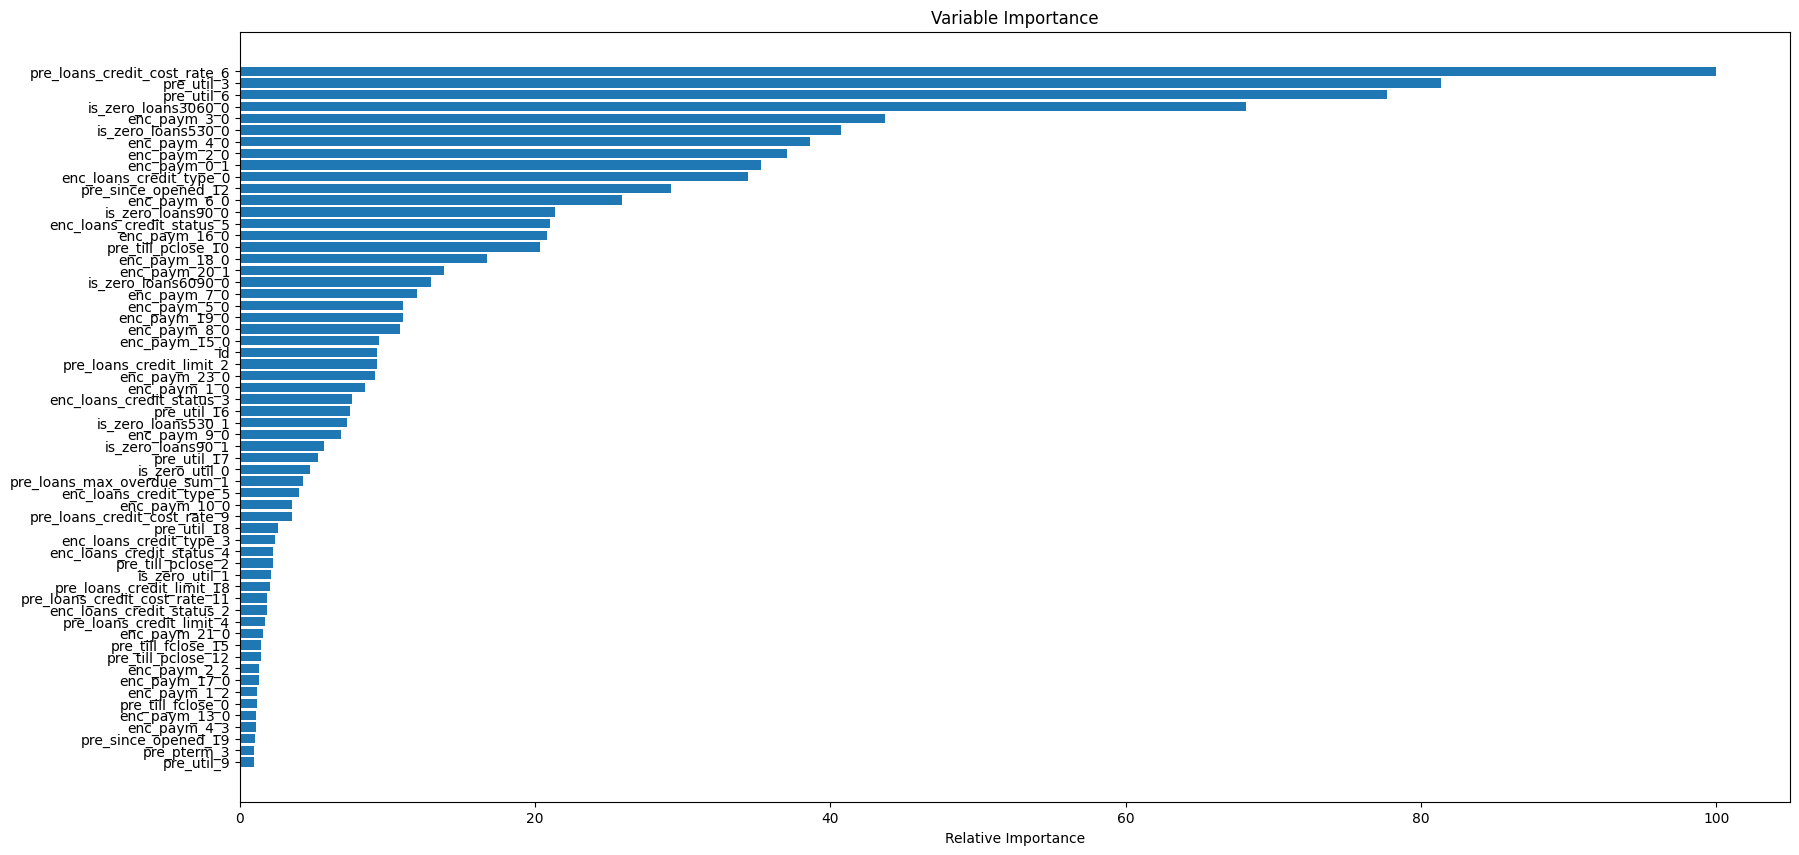

In [58]:
plt.figure(figsize=(20, 10))
plt.barh(pos[360:], feature_importance[sorted_idx][360:], align='center')
plt.yticks(pos[360:], X_train.keys()[sorted_idx][360:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### GridSearchCV

In [66]:
gbc = GradientBoostingClassifier(verbose=5)

parameters = {
    "n_estimators":[10,20,30],
    "max_depth":[3,5,6],
    "learning_rate":[0.01,0.1]
}

In [67]:
cv = RandomizedSearchCV(gbc,
                          parameters,
                          cv=3)

In [68]:
cv.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           0.3029           11.64m
         2           0.3004           11.21m
         3           0.2983           10.84m
         4           0.2965           10.38m
         5           0.2950            9.99m
         6           0.2935            9.51m
         7           0.2923            8.98m
         8           0.2912            8.36m
         9           0.2901            7.73m
        10           0.2892            7.07m
        11           0.2884            6.39m
        12           0.2876            5.70m
        13           0.2869            5.00m
        14           0.2863            4.30m
        15           0.2857            3.58m
        16           0.2852            2.87m
        17           0.2847            2.16m
        18           0.2842            1.44m
        19           0.2838           43.21s
        20           0.2834            0.00s
      Iter       Train Loss   Remaining Time 
        

         4           0.3051            4.24m
         5           0.3047            3.53m
         6           0.3044            2.82m
         7           0.3041            2.12m
         8           0.3039            1.41m
         9           0.3036           42.60s
        10           0.3033            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.3060           18.95m
         2           0.3056           17.51m
         3           0.3052           16.40m
         4           0.3048           15.21m
         5           0.3044           14.13m
         6           0.3041           13.26m
         7           0.3037           12.22m
         8           0.3034           11.10m
         9           0.3030           10.08m
        10           0.3027           55.91m
        11           0.3024           46.47m
        12           0.3021           48.92m
        13           0.3018          137.18m
        14           0.3015          225.06m
        1

        17           0.2847           10.06m
        18           0.2842            9.28m
        19           0.2838            8.49m
        20           0.2834            7.83m
        21           0.2830            7.07m
        22           0.2826            6.28m
        23           0.2823            5.49m
        24           0.2820            4.71m
        25           0.2817            3.92m
        26           0.2814            3.14m
        27           0.2811            2.35m
        28           0.2808            1.57m
        29           0.2806           46.85s
        30           0.2804            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.3031           21.73m
         2           0.3005           21.45m
         3           0.2984           20.27m
         4           0.2968           19.50m
         5           0.2951           18.81m
         6           0.2938           18.04m
         7           0.2925           17.38m
         

        10           0.2892            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.3031            6.70m
         2           0.3005            6.04m
         3           0.2984            5.26m
         4           0.2968            4.53m
         5           0.2951            3.80m
         6           0.2938            3.04m
         7           0.2925            2.29m
         8           0.2913            1.54m
         9           0.2903           46.23s
        10           0.2893            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.3029            6.87m
         2           0.3005            6.10m
         3           0.2983            5.36m
         4           0.2966            4.61m
         5           0.2950            3.86m
         6           0.2935            3.10m
         7           0.2924            2.32m
         8           0.2912            1.54m
         9           0.2902           46.37s
        

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(verbose=5),
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 5, 6],
                                        'n_estimators': [10, 20, 30]})

In [69]:
cv.best_params_

{'n_estimators': 10, 'max_depth': 5, 'learning_rate': 0.01}

In [72]:
cv.cv_results_['params']

[{'n_estimators': 20, 'max_depth': 5, 'learning_rate': 0.1},
 {'n_estimators': 30, 'max_depth': 6, 'learning_rate': 0.1},
 {'n_estimators': 10, 'max_depth': 5, 'learning_rate': 0.01},
 {'n_estimators': 20, 'max_depth': 6, 'learning_rate': 0.01},
 {'n_estimators': 10, 'max_depth': 6, 'learning_rate': 0.01},
 {'n_estimators': 20, 'max_depth': 3, 'learning_rate': 0.01},
 {'n_estimators': 30, 'max_depth': 5, 'learning_rate': 0.1},
 {'n_estimators': 10, 'max_depth': 6, 'learning_rate': 0.1},
 {'n_estimators': 20, 'max_depth': 6, 'learning_rate': 0.1},
 {'n_estimators': 10, 'max_depth': 5, 'learning_rate': 0.1}]

In [79]:
roc_auc_score(y_test, y_pred)

0.5001135341599243

### Финальная модель

In [9]:
model = GradientBoostingClassifier(
    n_estimators=10, 
    max_depth=5,  
    learning_rate=0.01,
    verbose=1
)

In [ ]:
model.fit(
    X_train, y_train
)

      Iter       Train Loss   Remaining Time 
         1           0.3061            9.69m
         2           0.3058            9.15m
         3           0.3054            8.16m
